In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Part 1: The Gravitational Potential of the Earth

**1**

In [4]:
def g_potential(G, M, x_M, y_M, x, y):
    r = np.sqrt((x - x_M)**2 + (y - y_M)**2)
    return np.where(r == 0 , np.nan, - G * M / r)

**2**

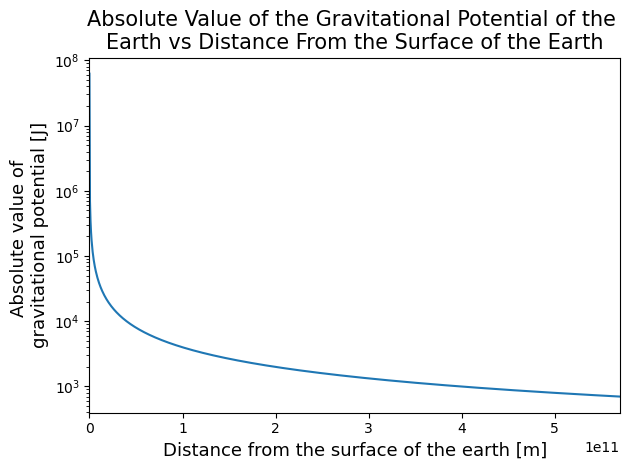

In [69]:
nx = 1000
D_EM = 3.8e8 * 10**3 # m
E_radius = 6378e3 # m 
x = np.linspace(0, 1.5 * D_EM, 1000)
G = 6.76e-11 # m^3/kg/s^2
M_earth = 5.9e24 # kg

potentials = np.abs(g_potential(G, M_earth, -E_radius, 0, x, 0))

fig1, ax1 = plt.subplots()
ax1.plot(x, potentials)
ax1.set_xlim(0, 1.5 * D_EM)
ax1.set_yscale('log')
ax1.set_xlabel('Distance from the surface of the earth [m]', size = 13)
ax1.set_ylabel('Absolute value of \ngravitational potential [J]', size = 13)
ax1.set_title('Absolute Value of the Gravitational Potential of the \nEarth vs Distance From the Surface of the Earth', size = 15)
plt.tight_layout()

**3**

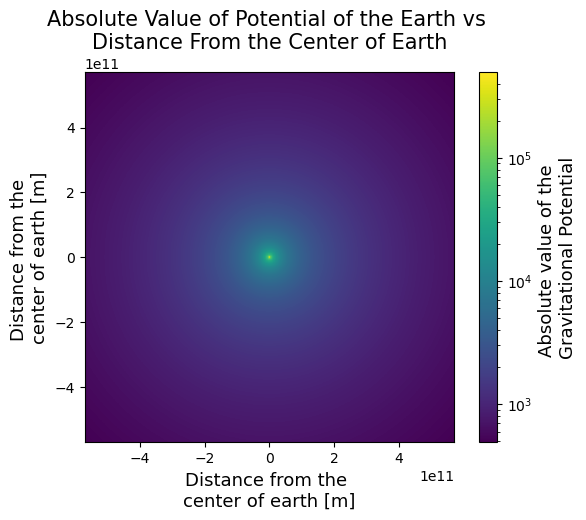

In [71]:
x3 = np.linspace(-1.5 * D_EM, 1.5 * D_EM, 1000)
y3 = np.linspace(-1.5 * D_EM, 1.5 * D_EM, 1000)
xx, yy = np.meshgrid(x3, y3)

potentials3 = np.abs(g_potential(G, M_earth, 0, 0, xx, yy))

fig2, ax2 = plt.subplots()
mesh = ax2.pcolormesh(xx, yy, potentials3, norm = 'log')
ax2.set_aspect('equal')
cbar2 = fig2.colorbar(mesh)
cbar2.set_label('Absolute value of the \nGravitational Potential', size = 13)
ax2.set_title('Absolute Value of Potential of the Earth vs \nDistance From the Center of Earth', size = 15)
ax2.set_xlabel('Distance from the \ncenter of earth [m]', size = 13)
ax2.set_ylabel('Distance from the \ncenter of earth [m]', size = 13)
fig2.tight_layout;

# Part 2: The Gravitational Potential of the Earth-Moon System 

**1**

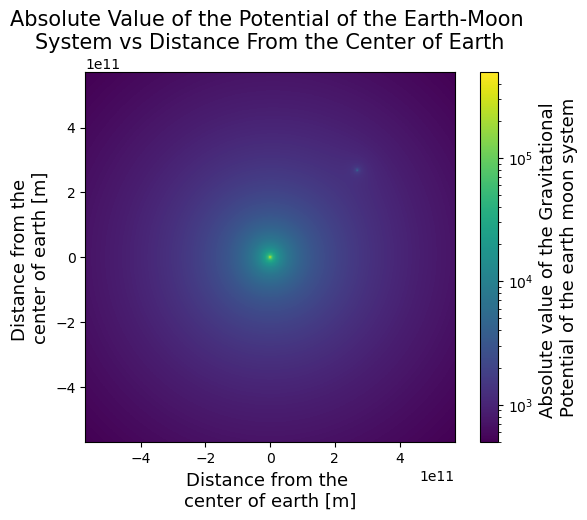

In [73]:
Ex = 0
Ey = 0 
Mx = D_EM / np.sqrt(2)
My = D_EM / np.sqrt(2)
M_moon = 7.3e22

Potentials_EM = np.abs(g_potential(G, M_earth, 0, 0, xx, yy) + g_potential(G, M_moon, Mx, My, xx, yy))

fig3, ax3 = plt.subplots()
mesh_EM = ax3.pcolormesh(xx, yy, Potentials_EM, norm = 'log')
ax3.set_aspect('equal')
cbar3 = fig3.colorbar(mesh_EM)
cbar3.set_label('Absolute value of the Gravitational \nPotential of the earth moon system', size = 13)
ax3.set_title('Absolute Value of the Potential of the Earth-Moon \nSystem vs Distance From the Center of Earth', size = 15)
ax3.set_xlabel('Distance from the \ncenter of earth [m]', size = 13)
ax3.set_ylabel('Distance from the \ncenter of earth [m]', size = 13)
fig3.tight_layout;

**2**

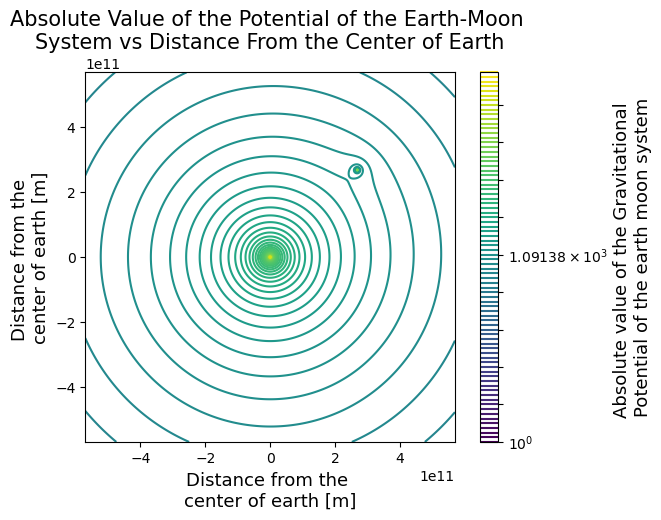

In [75]:
fig4, ax4 = plt.subplots()
levels = np.logspace(0, 6, 80)
Contour = ax4.contour(xx, yy, Potentials_EM, levels = levels, norm = 'log')
ax4.set_aspect('equal')
cbar4 = fig4.colorbar(Contour);
ax4.set_title('Absolute Value of the Potential of the Earth-Moon \nSystem vs Distance From the Center of Earth', size = 15)
ax4.set_xlabel('Distance from the \ncenter of earth [m]', size = 13)
ax4.set_ylabel('Distance from the \ncenter of earth [m]', size = 13)
cbar4.set_label('Absolute value of the Gravitational \nPotential of the earth moon system', size = 13)
fig4.tight_layout;

# Part 3: The Gravitational Force Field of the Earth-Moon System

**1**

In [23]:
def Force(G, M1, m2, x1, y1, x2, y2):
    r21_squared = (np.sqrt((x2-x1)**2 + (y2-y1)**2))**2
    vec_r21 = np.array([x2-x1, y2-y1])
    vec_r21_hat = vec_r21 / np.linalg.norm(vec_r21)
    if r21_squared == 0:
        Fx = np.nan
        Fy = np.nan
    else:
        Fx = (-G * M1 * m2 / r21_squared) * vec_r21_hat[0]
        Fy = (-G * M1 * m2 / r21_squared) * vec_r21_hat[1]
    return Fx, Fy

**2**

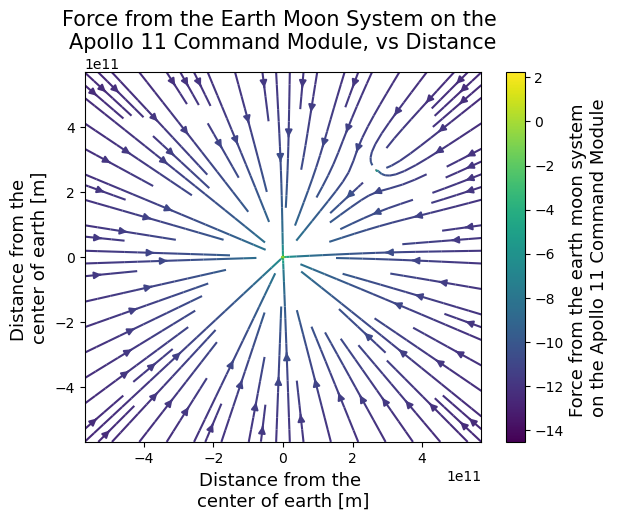

In [77]:
M_r = 5500 # kg

nx = 1000
ny = 1000

x2 = np.linspace(-1.5 * D_EM, 1.5 * D_EM, nx)
y2 = np.linspace(-1.5 * D_EM, 1.5 * D_EM, ny)
xx2, yy2 = np.meshgrid(x2, y2)

Force_v = np.vectorize(Force)
Forces_x = Force_v(G, M_earth, M_r, Ex, Ey, xx2, yy2)[0] + Force_v(G, M_moon, M_r, Mx, My, xx2, yy2)[0]
Forces_y = Force_v(G, M_earth, M_r, Ex, Ey, xx2, yy2)[1] + Force_v(G, M_moon, M_r, Mx, My, xx2, yy2)[1]

fig5, ax5 = plt.subplots()
colors = np.log(np.hypot(Forces_x, Forces_y))
stream = ax5.streamplot(xx2, yy2, Forces_x, Forces_y, color = colors)
cbar5 = fig5.colorbar(stream.lines)
ax5.set_title('Force from the Earth Moon System on the \nApollo 11 Command Module, vs Distance', size = 15)
ax5.set_xlabel('Distance from the \ncenter of earth [m]', size = 13)
ax5.set_ylabel('Distance from the \ncenter of earth [m]', size = 13)
cbar5.set_label('Force from the earth moon system \non the Apollo 11 Command Module', size = 13)
fig5.tight_layout;

# Part 4: Altitude of the Saturn V Rocket

**1**

In [29]:
m0 = 2.8e6 # kg
mf = 7.5e5 # kg
m_dot = 1.3e4 # kg/s

T = (m0 - mf) / m_dot
print('The total burn time is:', T, 'seconds')

The total burn time is: 157.69230769230768 seconds


**2**

In [31]:
Ve = 2.4e3 # m/s
g = 9.81 # m/s/s
def V_change(t, m0 = m0 , mf = mf, m_dot = m_dot, Ve = Ve, g = g):
    m = m0 - m_dot * t 
    T = (m0 - mf) / m_dot
    return np.where(t < T, Ve * np.log(m0 / m) - g * t, 0)

In [32]:
t = np.linspace(0, T, 1000)

h, h_err = quad(V_change, 0, T)
print('The altitude of the Saturn V Rocket at the end of the burn is:', h, 'plus or minus', h_err, 'meters')


The altitude of the Saturn V Rocket at the end of the burn is: 74093.98013366401 plus or minus 5.848811185394151e-08 meters
